In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import datasets, preprocessing, model_selection, linear_model, metrics

In [2]:
# Final dataset uploading
df = pd.read_csv("./data/data_final.csv").set_index('Row').drop(['Unnamed: 0'], axis=1)

In [3]:
# Data aggregarion by hours
df_pivot =  pd.pivot_table(df, index=['Date','hour'],
                                      values=['STARTLAT', 'Duration_minutes', 'distance', 
                                              'Air_Temperature', 'Precipitation_mm', 'Wind_velocity_ms',
                                             'if_week_morning_rush','if_week_afternoon_rush','if_week_midday',
                                             'if_week_evening', 'if_week_night', 'if_weekend_morning_rush',
                                             'if_weekend_afternoon_rush', 'if_weekend_midday', 'if_weekend_evening',
                                             'if_weekend_night', 'first_lockdown','after_lockdown', 'before_lockdown',
                                             'buildPOP_start', 'residential_end', 'mixed_end', 'recreational_end',
                                             'university_end', 'commercial_end', 'industrial_end', 'farmland_end'],
                                      aggfunc={'STARTLAT': 'count',
                                              'Duration_minutes': np.median,
                                              'distance': np.median,
                                              'Air_Temperature': np.median,
                                               'Precipitation_mm': np.median,
                                               'Wind_velocity_ms': np.median,
                                               'if_week_morning_rush': np.median,
                                               'if_week_afternoon_rush': np.median,
                                               'if_week_midday': np.median,
                                               'if_week_evening': np.median,
                                               'if_week_night': np.median,
                                               'if_weekend_morning_rush': np.median,
                                               'if_weekend_afternoon_rush': np.median,
                                               'if_weekend_midday': np.median,
                                               'if_weekend_evening': np.median,
                                               'if_weekend_night': np.median,
                                               'first_lockdown': np.median,
                                               'after_lockdown': np.median,
                                               'before_lockdown': np.median,
                                               'buildPOP_start': np.median, 
                                               'residential_end': np.mean, 
                                               'mixed_end': np.mean, 
                                               'recreational_end': np.mean,
                                               'university_end': np.mean, 
                                               'commercial_end': np.mean, 
                                               'industrial_end': np.mean, 
                                               'farmland_end': np.mean
                                              }).reset_index()
df_pivot.columns = ['Date','Hour','Air_Temperature','Median_duration',
                    'Precipitation', 'Trips_count', 'Wind', 'After_Lockdown', 
                    'Before_Lockdown', 'PopDens_start', 'Commercial_end', 'Median_distance', 
                    'Farmland_end','During_Lockdown', 'Week_AR',
                    'Week_Ev', 'Week_Md', 'Week_MR', 'Week_N', 'Weekend_AR',
                   'Weekend_Ev', 'Weekend_Md', 'Weekend_MR', 'Weekend_N',
                    'Industrial_end', 'Mixed_end', 'Recreational_end', 'Residential_end', 'University_end']
df_pivot

,Date,Hour,Air_Temperature,Median_duration,Precipitation,Trips_count,Wind,After_Lockdown,Before_Lockdown,PopDens_start,...,Weekend_AR,Weekend_Ev,Weekend_Md,Weekend_MR,Weekend_N,Industrial_end,Mixed_end,Recreational_end,Residential_end,University_end
0,2016-01-01,0,5.2,61.0,0.1,1,0.4,0,1,2259.438852,...,0,0,0,0,0,0.000000,0.000000,0.000000,1.000000,0.000000
1,2016-01-01,1,4.7,13.5,0.0,6,0.9,0,1,3133.837398,...,0,0,0,0,0,0.000000,0.666667,0.166667,0.166667,0.000000
2,2016-01-01,2,3.8,14.0,0.5,12,1.2,0,1,2445.271166,...,0,0,0,0,0,0.000000,0.666667,0.000000,0.250000,0.083333
3,2016-01-01,3,4.0,6.0,0.5,7,1.1,0,1,2669.160166,...,0,0,0,0,0,0.000000,0.571429,0.000000,0.428571,0.000000
4,2016-01-01,4,4.0,12.0,0.6,13,1.1,0,1,2093.853033,...,0,0,0,0,0,0.000000,0.538462,0.076923,0.384615,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60513,2022-12-31,19,11.9,13.0,0.0,63,2.4,1,0,2259.438852,...,0,1,0,0,0,0.031746,0.761905,0.031746,0.095238,0.063492
60514,2022-12-31,20,12.1,13.0,0.0,27,2.4,1,0,1753.144218,...,0,1,0,0,0,0.000000,0.555556,0.074074,0.259259,0.111111
60515,2022-12-31,21,11.0,15.0,0.0,16,2.2,1,0,2496.734592,...,0,1,0,0,0,0.000000,0.625000,0.000000,0.375000,0.000000
60516,2022-12-31,22,10.7,12.0,0.0,26,2.3,1,0,2016.231626,...,0,0,0,0,1,0.000000,0.307692,0.000000,0.423077,0.038462


In [4]:
# Data cleansing from NULL values
rows_with_missing_values = df_pivot[df_pivot.isnull().any(axis=1)]
df_cln = df_pivot.dropna()

### Polynomial regression model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Feature selection: weather conditions (air temperature, precipitation, wind), 
# periods of the lockdown (before, during, after), population density at start of the trip,
# land use type at end of the trip (commercial, agricultural, industrial, mixed, recreational, residentional, educational),
# time of the week (weekdays and weekends divided into different parts of the day)
X = df_cln[['Air_Temperature', 'Precipitation', 'Wind',
            'After_Lockdown', 'During_Lockdown','Before_Lockdown',
            'PopDens_start',
            'Commercial_end', 'Farmland_end', 'Industrial_end', 
            'Mixed_end', 'Recreational_end', 'Residential_end', 'University_end',
            'Week_AR', 'Week_Ev', 'Week_Md', 'Week_MR', 'Week_N', 
            'Weekend_AR','Weekend_Ev', 'Weekend_Md', 'Weekend_MR', 'Weekend_N']]

# Target variables definition
y_trips = df_cln['Trips_count']
y_duration = df_cln['Median_duration']
y_distance = df_cln['Median_distance']

#### Polynomial regression model for amount of trips (degree=2)

In [6]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_distance, test_size=0.2, random_state=10)

# Polynomial features creation
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions
y_pred = poly_model.predict(X_test_poly)

In [7]:
# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.24687254185115493
Root Mean Squared Error: 0.4789002179944229


In [8]:
# Description of training and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(48354, 24)
(48354,)
(12089, 24)
(12089,)


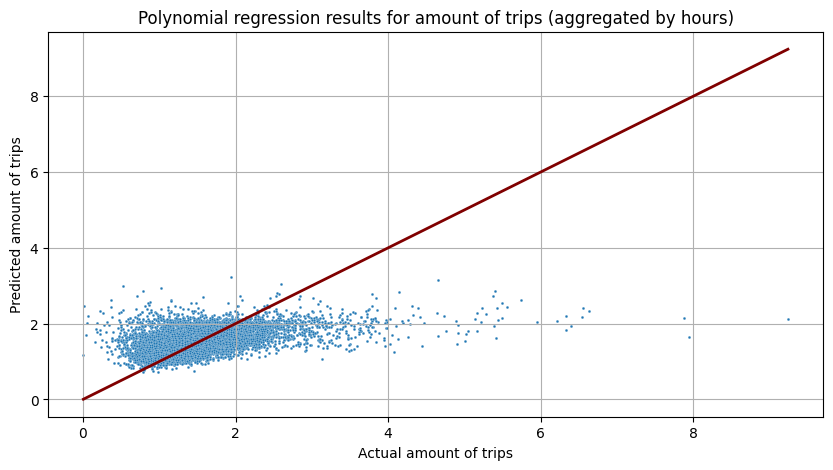

In [9]:
# Visualisation
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, s=4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='maroon', linestyle='-', lw=2)
plt.xlabel('Actual amount of trips')
plt.ylabel('Predicted amount of trips')
plt.title('Polynomial regression results for amount of trips (aggregated by hours)')
plt.grid(True)
plt.show()

#### Polynomial regression model for amount of trips (degree=3)

In [10]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_trips, test_size=0.2, random_state=10)

# Polynomial features creation
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions
y_pred = poly_model.predict(X_test_poly)

In [11]:
# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.08309170608519656
Root Mean Squared Error: 55.71802328911221


#### Polynomial regression model for median distance (degree=2)

In [57]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_distance, test_size=0.2, random_state=10)

# Polynomial features creation
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions
y_pred = poly_model.predict(X_test_poly)

In [58]:
# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.24687254185115493
Root Mean Squared Error: 0.4789002179944229


#### Polynomial regression model for median distance (degree=3)

In [29]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_distance, test_size=0.2, random_state=10)

# Polynomial features creation
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions
y_pred = poly_model.predict(X_test_poly)

In [30]:
# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -0.7298576173881399
Root Mean Squared Error: 0.7257983440698366


#### Polynomial regression model for median duration (degree=2)

In [31]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Polynomial features creation
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions
y_pred = poly_model.predict(X_test_poly)

In [32]:
# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -0.07245719163435016
Root Mean Squared Error: 8.197251692024201


#### Polynomial regression model for median duration (degree=3)

In [33]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Polynomial features creation
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions
y_pred = poly_model.predict(X_test_poly)

In [34]:
# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -0.8794424819191475
Root Mean Squared Error: 10.851575759114489


### Decision Trees regression model

In [35]:
from sklearn.tree import DecisionTreeRegressor

# Feature selection: weather conditions (air temperature, precipitation, wind), 
# periods of the lockdown (before, during, after), population density at start of the trip,
# land use type at end of the trip (commercial, agricultural, industrial, mixed, recreational, residentional, educational),
# time of the week (weekdays and weekends divided into different parts of the day)
X = df_cln[['Air_Temperature', 'Precipitation', 'Wind',
            'After_Lockdown', 'During_Lockdown','Before_Lockdown',
            'PopDens_start',
            'Commercial_end', 'Farmland_end', 'Industrial_end', 
            'Mixed_end', 'Recreational_end', 'Residential_end', 'University_end',
            'Week_AR', 'Week_Ev', 'Week_Md', 'Week_MR', 'Week_N', 
            'Weekend_AR','Weekend_Ev', 'Weekend_Md', 'Weekend_MR', 'Weekend_N']]

# Target variable definition
y_trips = df_cln['Trips_count']
y_duration = df_cln['Median_duration']
y_distance = df_cln['Median_distance']

#### Decision Trees regression model for amount of trips (max_depth=None)

In [37]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_trips, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=None) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.5968835557952377
Root Mean Squared Error: 36.94434806569882


#### Decision Trees regression model for amount of trips (max_depth=3)

In [38]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_trips, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=3) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.5161778921255735
Root Mean Squared Error: 40.47395127969643


#### Decision Trees regression model for amount of trips (max_depth=10)

In [60]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_trips, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=10) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: 0.7281067866440846
Root Mean Squared Error: 30.34114274397508


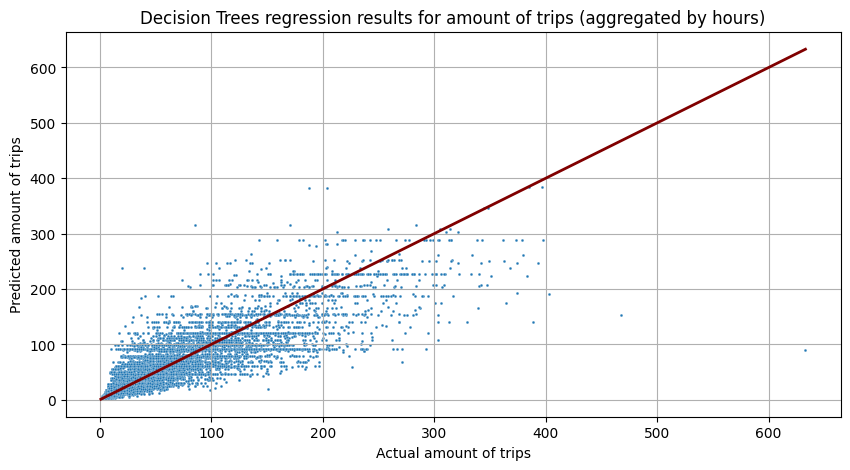

In [62]:
# Visualisation
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, s=4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='maroon', linestyle='-', lw=2)
plt.xlabel('Actual amount of trips')
plt.ylabel('Predicted amount of trips')
plt.title('Decision Trees regression results for amount of trips (aggregated by hours)')
plt.grid(True)
plt.show()

#### Decision Trees regression model for median distance (max_depth=None)

In [43]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=None) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -2.1628390828672748
Root Mean Squared Error: 14.077217978365708


#### Decision Trees regression model for median distance (max_depth=3)

In [44]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=3) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -0.006676356685875184
Root Mean Squared Error: 7.9418781857545655


#### Decision Trees regression model for median distance (max_depth=10)

In [45]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=10) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -1.319758846439858
Root Mean Squared Error: 12.055901941889609


#### Decision Trees regression model for median duration (max_depth=None)

In [43]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=None) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -2.1628390828672748
Root Mean Squared Error: 14.077217978365708


#### Decision Trees regression model for median duration (max_depth=3)

In [44]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=3) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -0.006676356685875184
Root Mean Squared Error: 7.9418781857545655


#### Decision Trees regression model for median duration (max_depth=10)

In [45]:
# Splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_duration, test_size=0.2, random_state=10)

# Creating and fitting the model
decision_tree_model = DecisionTreeRegressor(random_state=10, max_depth=10) 
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree_model.predict(X_test)

# Evaluation of the model
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

R-squared: -1.319758846439858
Root Mean Squared Error: 12.055901941889609
